In [58]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import contextily as cx

dd = Path().cwd().parent.parent / 'data'

In [32]:
rec = gpd.read_file(dd / 'north_county_rec_center.geojson')
lib = gpd.read_file(dd / 'north_county_libraries.geojson')
school = gpd.read_file(dd / 'north_county_middle_schools.geojson')

In [ ]:
def league_loc():

    from opencage.geocoder import OpenCageGeocode
    
    key = '31597b350ddd4ff1903241165cc72520'
    geocoder = OpenCageGeocode(key)
    
    query = u'12625 High Bluff, San Diego, CA'
    
    # no need to URI encode query, module does that for you
    results = geocoder.geocode(query)
    
    from shapely.geometry import Point; 
    
    return Point(results[0]['geometry']['lng'], results[0]['geometry']['lat']).wkt

# 'POINT (-117.240546 32.948749)'
# league_loc()

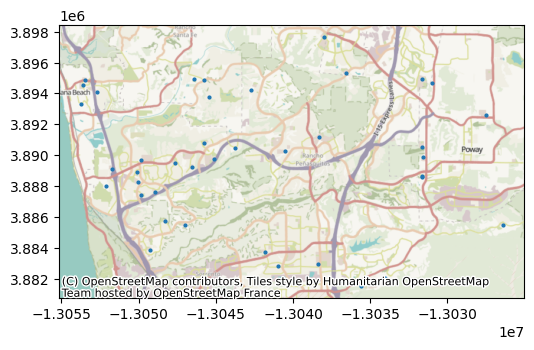

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = school.to_crs(epsg=3857) # Make it web mercator to match the basemap

t.plot(markersize=4,   legend=True, ax=ax)

cx.add_basemap(ax)
#leg = ax.get_legend()                                                                         
#leg.set_bbox_to_anchor((1, 1))  


In [61]:
rec['name'] = rec.REC_BLDG + ' / ' + rec.PARK_NAME
rec['type'] = 'rec center'
rec = rec.rename(columns={'ADDRESS':'address'})
rec.head()

,REC_BLDG,PARK_NAME,address,CITY,ZIP,OBJECTID,geometry,name,type,NAME
0,Black Mtn Multi-Purpose Gym,Black Mountain Middle School,9353 Oviedo St,San Diego,92126,5,MULTIPOINT (-117.12650 32.96938),Black Mtn Multi-Purpose Gym / Black Mountain M...,rec center,Black Mtn Multi-Purpose Gym / Black Mountain M...
1,Canyonside Rec Center,Canyonside Community Park,12350 Black Mountain Rd,San Diego,92126,8,MULTIPOINT (-117.13075 32.94199),Canyonside Rec Center / Canyonside Community Park,rec center,Canyonside Rec Center / Canyonside Community Park
2,Carmel Mtn Ranch / Sabre Springs Rec Cen,Carmel Mtn Ranch / Sabre Springs Comm Park,10152 Rancho Carmel Dr,San Diego,92128,9,MULTIPOINT (-117.09010 32.96588),Carmel Mtn Ranch / Sabre Springs Rec Cen / Car...,rec center,Carmel Mtn Ranch / Sabre Springs Rec Cen / Car...
3,Carmel Vly TownCenter Rec Center,Carmel Valley TownCenter Community Park,3770 Townsgate Dr,San Ysidro,92130,10,MULTIPOINT (-117.23520 32.94923),Carmel Vly TownCenter Rec Center / Carmel Vall...,rec center,Carmel Vly TownCenter Rec Center / Carmel Vall...
4,Gil Johnson Rec Center,Mira Mesa Community Park,8575 New Salem St,San Diego,92126,20,MULTIPOINT (-117.13922 32.91500),Gil Johnson Rec Center / Mira Mesa Community Park,rec center,Gil Johnson Rec Center / Mira Mesa Community Park


In [56]:
lib = lib.rename(columns={'NAME':'name','ADDRESS':'address','PHONE':'phone', 'CITY':'city'})
lib['type'] = 'Library'
lib.head()


,WEBSITE,address,DISTRICT,name,TYPE,phone,ZIP,city,DATA_SRC,UPDATE_DAT,geometry,type
0,http://www.sandiego.gov/public-library/,12095 World Trade Dr.,San Diego Public (City),Carmel Mountain Ranch,Public,(858) 538-8181,92128,"San Diego, CA",City of San Diego,2023-07-25,POINT (-117.07383 32.98171),Library
1,http://www.sandiego.gov/public-library/,3919 Townsgate Drive,San Diego Public (City),Carmel Valley,Public,(858) 552-1668,92130,"San Diego, CA",City of San Diego,2023-07-25,POINT (-117.23056 32.95226),Library
2,http://www.sandiego.gov/public-library/,8405 New Salem St,San Diego Public (City),Mira Mesa,Public,(858) 538-8165,92126,"San Diego, CA",City of San Diego,2023-07-25,POINT (-117.14271 32.91532),Library
3,http://www.sandiego.gov/public-library/,17110 Bernardo Center Drive,San Diego Public (City),Rancho Bernardo,Public,(858) 538-8163,92128,"San Diego, CA",City of San Diego,2023-07-25,POINT (-117.07492 33.02494),Library
4,http://www.sandiego.gov/public-library/,13330 Salmon River Road,San Diego Public (City),Rancho Penasquitos,Public,(858) 538-8159,92129,"San Diego, CA",City of San Diego,2023-07-25,POINT (-117.12193 32.95799),Library


In [69]:
school['type'] = 'school'
school['cv_miles'] = school.cv_miles.round(2)
school.head()

,schoolID,name,district,priv,child_density,med_income,cv_miles,minGrade,maxGrade,cd_pct,mi_pct,metric,geometry,type
0,51,Wangenheim Middle,San Diego Unified,N,0.000208,187686.0,7.28,6.0,8.0,0.547573,0.760194,0.416262,POINT (488211.745 3640960.838),school
1,252,Oak Valley Middle,Poway Unified,N,0.000177,195875.0,8.45,6.0,8.0,0.428155,0.816990,0.349799,POINT (489748.770 3651300.777),school
2,255,Solana Pacific Elementary,Solana Beach Elementary,N,0.000225,250001.0,0.61,4.0,6.0,0.590777,0.967476,0.571562,POINT (478404.564 3645948.449),school
3,377,Sycamore Ridge,Del Mar Union Elementary,N,0.000243,250001.0,2.46,0.0,6.0,0.633010,0.967476,0.612422,POINT (481378.668 3646254.326),school
4,443,Skyline Elementary,Solana Beach Elementary,N,0.000076,226548.0,3.59,0.0,6.0,0.115534,0.901456,0.104149,POINT (475576.971 3650972.160),school


In [72]:
t = pd.concat([
    rec[['type','name','address']],
    lib[['type','name','address','phone']],
    school[school.cv_miles<9].sort_values(['priv','cv_miles'])[['type','name','district','priv', 'cv_miles','minGrade','maxGrade']]
    
]).fillna('')

t.to_csv(dd/'target_sites.csv')

In [73]:
15000/(35*1.4)

306.1224489795918

'POINT (-117.240546 32.948749)'